# NLP Based Sypmtoms Detector

> ## Steps:

> ### Data preprocessing

> ### Setting up Tokenizer
- Building a tokenizer instance & Fitting our sentences on the tokenizer
- Getting word index created by tokenizer from our sentences
- Building sequences from sentences and then padding them 'Post' fashion
- Convert our classes (labels_categories) to columns level which can be passed to keras modelling.

> ### Building model: 
-  Creating train-test split for preparing data for modelling and testing the model
-  Model building using Embedding as initial layer and then applying LSTM technique (bidirectional)

> ### Validating model: 
- Plotting the training and validation accuracy & losses

> ### Model validation with new random Text

In [2]:
!pip install nltk

     |████████████████████████████████| 1.5 MB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 7.1 MB/s  eta 0:00:01
     |████████████████████████████████| 284 kB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 8.7 MB/s  eta 0:00:01


In [1]:
## Importing libraries

import json
import tensorflow as tf
import csv
import random
import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

## Initializing global variables
embedding_dim = 100
max_length = 21
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=6661
test_portion=.3

corpus = []


## Data preprocessing

In [1]:
## Reading the data file for training purpose...
df = pd.read_pickle("recordings-overview.csv")

NameError: name 'pd' is not defined

In [3]:
df.head(2)

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,21665495
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,44088126


In [4]:
df.shape

(6661, 13)

In [5]:
sentences = df['phrase'].values

In [6]:
labels = df['prompt'].values

In [7]:
## This is to capture the total Classes (Labels) our data has.
len(df['prompt'].value_counts())

25

## Setting up Tokenizer
- Building a tokenizer instance & Fitting our sentences on the tokenizer
- Getting word index created by tokenizer from our sentences
- Building sequences from sentences and then padding them 'Post' fashion
- Convert our classes (labels_categories) to columns level which can be passed to keras modelling.

In [11]:
## Building a tokenizer instance

tokenizer = Tokenizer(oov_token=oov_tok)

In [12]:
## Fitting our sentences on the tokenizer

tokenizer.fit_on_texts(sentences)

In [82]:
tokenizer.word_index

{'i': 1,
 'my': 2,
 'a': 3,
 'in': 4,
 'have': 5,
 'pain': 6,
 'feel': 7,
 'and': 8,
 'the': 9,
 'when': 10,
 'is': 11,
 'to': 12,
 'it': 13,
 'of': 14,
 'on': 15,
 "can't": 16,
 'up': 17,
 'like': 18,
 'hurts': 19,
 'get': 20,
 'with': 21,
 'that': 22,
 'back': 23,
 'me': 24,
 'after': 25,
 'was': 26,
 "i'm": 27,
 'out': 28,
 'hair': 29,
 'shoulder': 30,
 'there': 31,
 'but': 32,
 'head': 33,
 'cold': 34,
 'knee': 35,
 'an': 36,
 'feels': 37,
 'body': 38,
 'neck': 39,
 'skin': 40,
 'ache': 41,
 'stomach': 42,
 'not': 43,
 'heart': 44,
 'so': 45,
 'foot': 46,
 'stand': 47,
 'time': 48,
 'ear': 49,
 'sharp': 50,
 'dizzy': 51,
 'had': 52,
 'or': 53,
 'lot': 54,
 'wound': 55,
 'hard': 56,
 'this': 57,
 'at': 58,
 'every': 59,
 'walk': 60,
 'for': 61,
 'breath': 62,
 'very': 63,
 "it's": 64,
 'cough': 65,
 'acne': 66,
 'because': 67,
 'cut': 68,
 'face': 69,
 'something': 70,
 'feeling': 71,
 'am': 72,
 'are': 73,
 'down': 74,
 'left': 75,
 'all': 76,
 'think': 77,
 'vision': 78,
 'chest':

In [13]:
## Getting word index created by tokenizer from our sentences

word_index = tokenizer.word_index
vocab_size=len(word_index)

In [14]:
## Building sequences from sentences and then padding them 'Post' fashion

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [16]:
## Below was run to find the deciding length for truncation...

# dicti = {}
# ctr = 0
# for i in sequences:
#     dicti[ctr] = len(i)
#     ctr = ctr + 1
# df = pd.DataFrame.from_dict(dicti,columns=['length'], orient='index')
# df.length.value_counts()

In [17]:
## Below is to convert our classes (labels_categories) to columns level which can be passed to keras modelling.

labels_df = pd.get_dummies(labels)

In [18]:
labels_df

,Acne,Back pain,Blurry vision,Body feels weak,Cough,Ear ache,Emotional pain,Feeling cold,Feeling dizzy,Foot ache,...,Injury from sports,Internal pain,Joint pain,Knee pain,Muscle pain,Neck pain,Open wound,Shoulder pain,Skin issue,Stomach ache
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6658,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building model: 
-  Creating train-test split for preparing data for modelling and testing the model
-  Model building using Embedding as initial layer and then applying LSTM technique (bidirectional)

In [19]:
## Creating train-test split for preparing data for modelling and testing the model...

from sklearn.model_selection import train_test_split
training_sequences, test_sequences, training_labels, test_labels = train_test_split(padded, labels_df, test_size=0.3, random_state=42)

In [18]:
len(training_sequences)
#len(test_sequences)

4662

In [18]:
## Model building using Embedding as initial layer and then applying LSTM technique (bidirectional).

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, 64, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
#     tf.keras.layers.Dense(21, activation='relu'),
    tf.keras.layers.Dense(25, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Setting epochs
num_epochs = 20

training_padded = np.array(training_sequences)
training_labels = np.array(training_labels)
testing_padded = np.array(test_sequences)
testing_labels = np.array(test_labels)

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels), verbose=2)

print("Training Complete")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 21, 64)            74368     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 25)                3225      
Total params: 143,641
Trainable params: 143,641
Non-trainable params: 0
_________________________________________________________________
Train on 4662 samples, validate on 1999 samples
Epoch 1/20
4662/4662 - 34s - loss: 0.2265 - accuracy: 0.9496 - val_loss: 0.1683 - val_accuracy: 0.9600
Epoch 2/20
4662/4662 - 1s - loss: 0.1680 - accuracy: 0.9600 - val_loss: 0.1682 - val_accuracy: 0.9600
Epoch 3/20
4662/4662 - 1s - loss: 0.1669 - accuracy: 0.9600 - val_loss: 0.1666 - val_accuracy: 0.9600
Epoch 4/20
4662/4662 - 1s

In [19]:
history.history['val_accuracy']

[0.9599993,
 0.9599993,
 0.9599993,
 0.9599993,
 0.9600995,
 0.96084034,
 0.96296144,
 0.96524256,
 0.9736268,
 0.98633313,
 0.99321675,
 0.9974187,
 0.9977588,
 0.99885947,
 0.99915946,
 0.9993196,
 0.9994397,
 0.9994797,
 0.99933964,
 0.99967974]

## Validating model: 
- Plotting the training and validation accuracy & losses

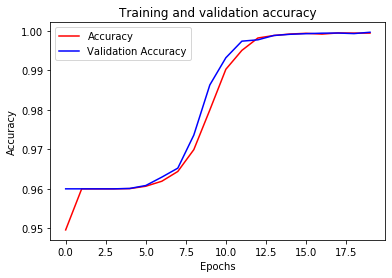

<Figure size 432x288 with 0 Axes>

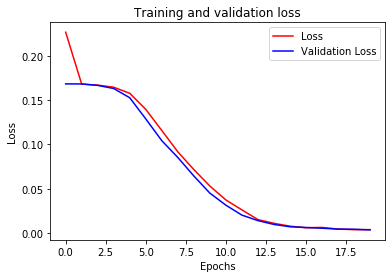

<Figure size 432x288 with 0 Axes>

In [21]:
## Plotting the training and validation accuracy & losses...

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()
plt.show()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()
plt.show()

# Expected Output
# A chart where the validation loss does not increase sharply!

### Model validation with new random Text

In [109]:
dumm_sen = ['this is ankit and i fell while playing sports']
dumm_sequence = tokenizer.texts_to_sequences(dumm_sen)
dumm_padded = pad_sequences(dumm_sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [110]:
dumm_padded

array([[ 57,  11,   8,   1, 192, 137, 111, 155,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0]], dtype=int32)

In [111]:
model.predict_classes(dumm_padded)

array([15])

In [112]:
labels_df.columns[model.predict_classes(dumm_padded)]

Index(['Injury from sports'], dtype='object')